In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df_indo = pd.read_csv('sensus_penduduk.csv',skiprows=3, engine='python', skipfooter=3, na_values=['-'])
df_indo = df_indo.rename({'Unnamed: 0':'Provinsi'}, axis=1)
df_indo = df_indo.set_index('Provinsi')
df_indo

,1971,1980,1990,1995,2000,2010
Provinsi,,,,,,
Aceh,2008595.0,2611271.0,3416156.0,3847583.0,3930905.0,4494410
Sumatera Utara,6621831.0,8360894.0,10256027.0,11114667.0,11649655.0,12982204
Sumatera Barat,2793196.0,3406816.0,4000207.0,4323170.0,4248931.0,4846909
Riau,1641545.0,2168535.0,3303976.0,3900534.0,4957627.0,5538367
Jambi,1006084.0,1445994.0,2020568.0,2369959.0,2413846.0,3092265
Sumatera Selatan,3440573.0,4629801.0,6313074.0,7207545.0,6899675.0,7450394
Bengkulu,519316.0,768064.0,1179122.0,1409117.0,1567432.0,1715518
Lampung,2777008.0,4624785.0,6017573.0,6657759.0,6741439.0,7608405
Kepulauan Bangka Belitung,NaN,NaN,NaN,NaN,900197.0,1223296


In [3]:
prov_min = df_indo[df_indo['1971']== df_indo['1971'].min()]
prov_min

,1971,1980,1990,1995,2000,2010
Provinsi,,,,,,
Bengkulu,519316.0,768064.0,1179122.0,1409117.0,1567432.0,1715518


In [4]:
prov_max = df_indo[df_indo['2010']== df_indo['2010'].max()]
prov_max

,1971,1980,1990,1995,2000,2010
Provinsi,,,,,,
Jawa Barat,21623529.0,27453525.0,35384352.0,39206787.0,35729537.0,43053732


In [5]:
df_indo1 = pd.read_csv('sensus_penduduk.csv',skiprows=3, engine='python', skipfooter=2, na_values=['-'])
df_indo1 = df_indo1.rename({'Unnamed: 0':'Provinsi'}, axis=1)
df_indo1 = df_indo1.set_index('Provinsi')

indo = df_indo1[df_indo1['2010']== df_indo1['2010'].max()]
indo

,1971,1980,1990,1995,2000,2010
Provinsi,,,,,,
INDONESIA,119208229.0,147490298.0,179378946.0,194754808.0,206264595.0,237641326


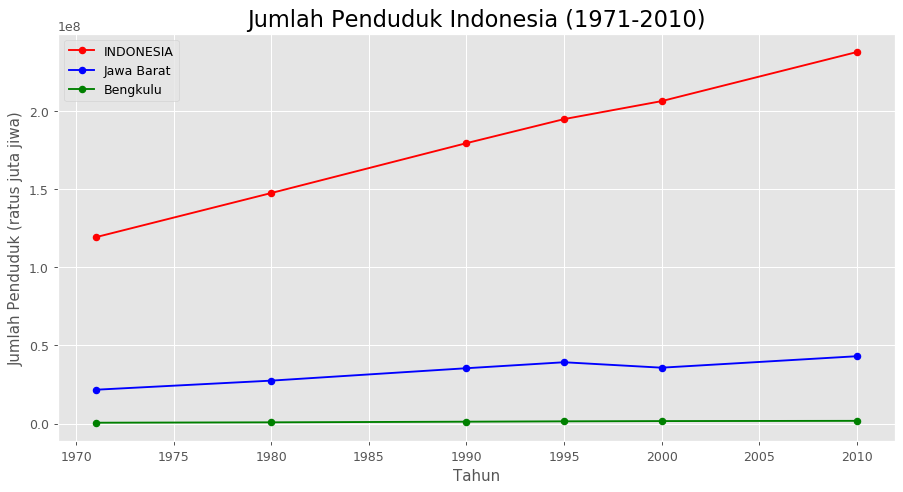

In [10]:
tahun = indo.columns
tahun = np.array(list(map(lambda x: int(x),tahun)))

plt.style.use('ggplot')
plt.figure(figsize=(12,6), dpi = 90)
plt.plot(tahun,indo.values[0],marker='o',markersize=5,markerfacecolor='r',color = 'red', label = list(indo.index)[0])
plt.plot(tahun,prov_max.values[0],marker='o',markersize=5,markerfacecolor='b', color = 'blue', label = list(prov_max.index)[0])
plt.plot(tahun,prov_min.values[0],marker='o',markersize=5,markerfacecolor='g', color = 'green', label = list(prov_min.index)[0])

plt.title("Jumlah Penduduk Indonesia (1971-2010)", fontsize=18, y=1.0)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penduduk (ratus juta jiwa)')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
tahun = tahun.reshape(6,-1)
model1 = linear_model.LinearRegression()
model1.fit(tahun,indo.values[0])

print(model1.coef_[0])       #mencari m
print(model1.intercept_)  #mencari c

pred1 = model1.predict(tahun)
pred1

3025152.0173469386
-5842287966.204422


array([1.20286660e+08, 1.47513028e+08, 1.77764548e+08, 1.92890308e+08,
       2.08016068e+08, 2.38267589e+08])

In [13]:
model2 = linear_model.LinearRegression()
model2.fit(tahun,prov_min.values[0])

print(model2.coef_[0])       #mencari m
print(model2.intercept_)  #mencari c

pred2 = model2.predict(tahun)
pred2

32983.72653061225
-64477504.68911565


array([ 533420.30272109,  830273.8414966 , 1160111.10680272,
       1325029.73945579, 1489948.37210885, 1819785.63741497])

In [14]:
model3 = linear_model.LinearRegression()
model3.fit(tahun,prov_max.values[0])

print(model3.coef_[0])       #mencari m
print(model3.intercept_)  #mencari c

pred3 = model3.predict(tahun)
pred3

537316.512244898
-1036055265.5462586


array([22995580.08843541, 27831428.69863951, 33204593.82108843,
       35891176.38231301, 38577758.94353735, 43950924.06598651])

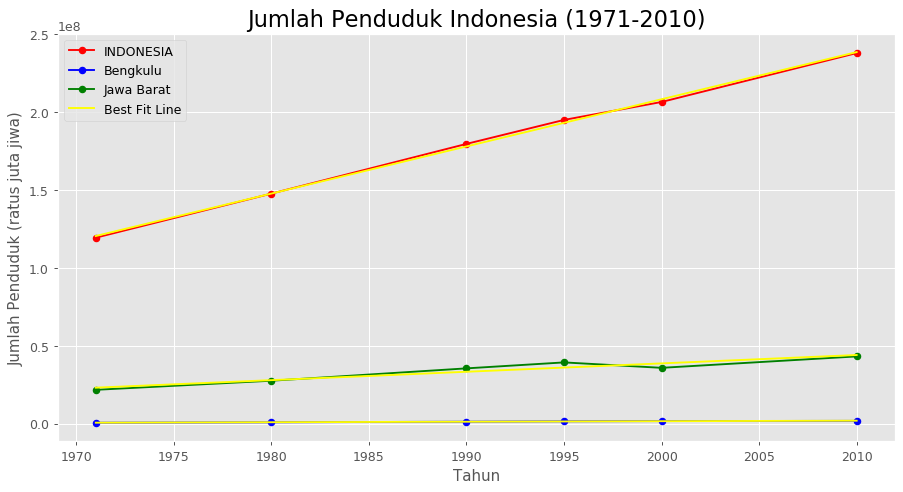

In [16]:
plt.figure(figsize=(12,6), dpi = 90)
plt.plot(tahun,indo.values[0],marker='o',markersize=5,markerfacecolor='r',color = 'red', label = list(indo.index)[0])
plt.plot(tahun,prov_min.values[0],marker='o',markersize=5,markerfacecolor='b', color = 'blue', label = list(prov_min.index)[0])
plt.plot(tahun,prov_max.values[0],marker='o',markersize=5,markerfacecolor='g', color = 'green', label = list(prov_max.index)[0])

plt.plot(tahun,pred1,color = 'yellow', label = 'Best Fit Line' )
plt.plot(tahun,pred2,color = 'yellow')
plt.plot(tahun,pred3,color = 'yellow')

plt.title("Jumlah Penduduk Indonesia (1971-2010)", fontsize=18, y=1.0)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penduduk (ratus juta jiwa)')
plt.grid(True)
plt.legend()
plt.show()

In [17]:
print(f'Prediksi jumlah penduduk {list(prov_max.index)[0]} di tahun 2050 : {int(round(model3.predict([[2050]])[0]))}')
print(f'Prediksi jumlah penduduk {list(prov_min.index)[0]} di tahun 2050 : {int(round(model2.predict([[2050]])[0]))}')
print(f'Prediksi jumlah penduduk {list(indo.index)[0]} di tahun 2050 : {int(round(model1.predict([[2050]])[0]))}')

Prediksi jumlah penduduk Jawa Barat di tahun 2050 : 65443585
Prediksi jumlah penduduk Bengkulu di tahun 2050 : 3139135
Prediksi jumlah penduduk INDONESIA di tahun 2050 : 359273669
